In [5]:
# Import all required libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned data
df = pd.read_csv("../datasets/FINAL_MERGED_DATASET_CLEAN.csv")

In [7]:
# Best practice version:
X = df[['protocol', 'port', 'bytes_sent', 'bytes_received']].copy()

# Simple factorize (no encoder saving needed)
X['protocol'], protocol_labels = pd.factorize(X['protocol'])
print(f"Protocol mapping: {dict(enumerate(protocol_labels))}")


Protocol mapping: {0: 'UDP', 1: 'TCP', 2: 'IP', 3: 'UNKNOWN', 4: 'udp', 5: 'tcp', 6: 'icmp', 7: 'ARP'}


In [8]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Train model
rf = RandomForestClassifier(n_estimators=150, 
                          max_depth=12, 
                          min_samples_split=5,
                          class_weight='balanced',
                          random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=12,
                       min_samples_split=5, n_estimators=150, random_state=42)

Classification Report:
              precision    recall  f1-score   support

      Attack       1.00      0.97      0.98        66
      Normal       0.98      1.00      0.99        84

    accuracy                           0.99       150
   macro avg       0.99      0.98      0.99       150
weighted avg       0.99      0.99      0.99       150



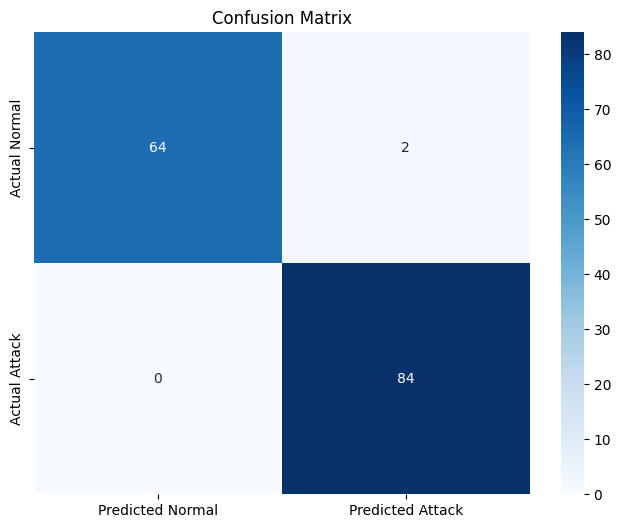

In [10]:
# Evaluate
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]  # Probabilities for Attack class

# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 2. Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Normal', 'Predicted Attack'],
            yticklabels=['Actual Normal', 'Actual Attack'])
plt.title('Confusion Matrix')
plt.savefig('../models/confusion_matrix.png')
plt.show()


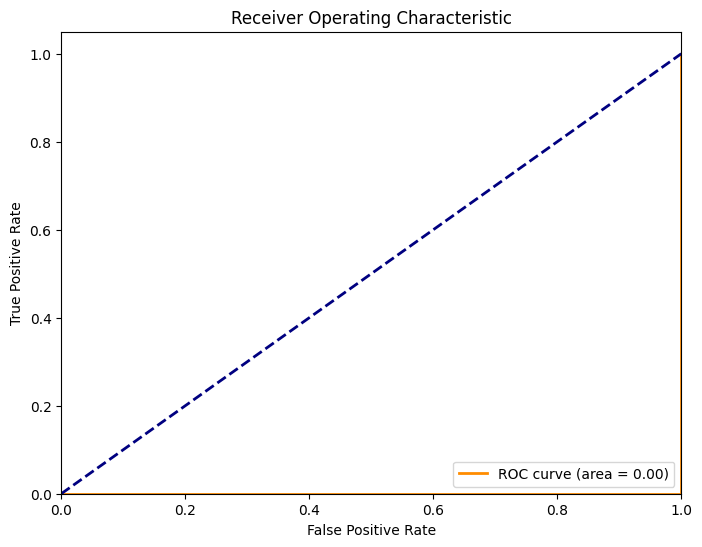

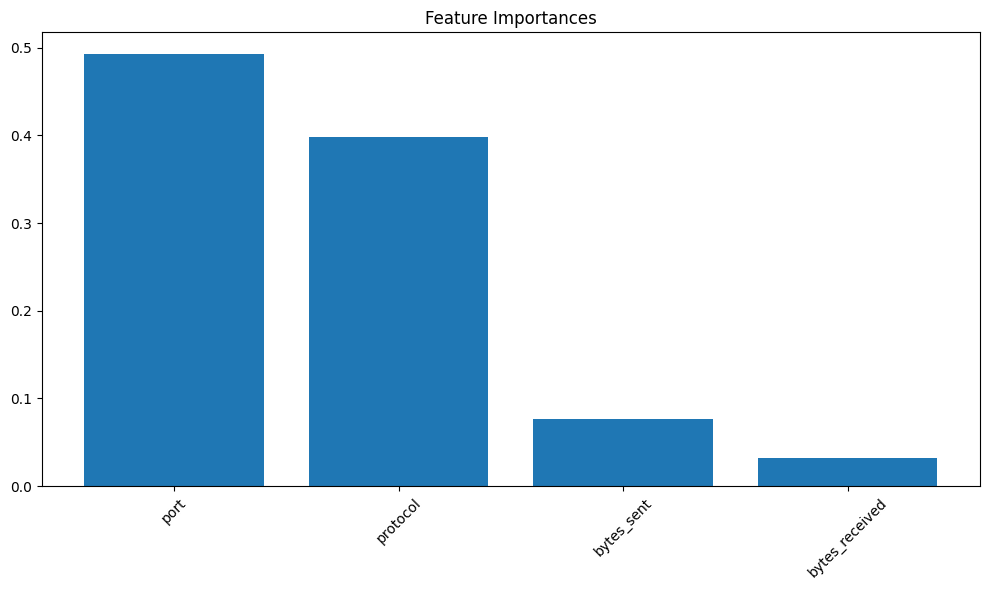

In [11]:
# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob, pos_label='Attack')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.savefig('../models/roc_curve.png')
plt.show()

# 4. Feature Importance
importances = rf.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), [features[i] for i in indices], rotation=45)
plt.tight_layout()
plt.savefig('../models/feature_importance.png')
plt.show()

In [12]:
# Save model
import joblib
joblib.dump(rf, "../models/rf_model.pkl")
joblib.dump(le, "../models/protocol_encoder.pkl")  # Save the label encoder
print("Model and encoder saved successfully!")

Model and encoder saved successfully!


In [13]:
print("Number of features:", len(rf.feature_names_in_))

Number of features: 4


In [3]:
import sklearn
print(sklearn.__version__)


1.5.2
